In [ ]:
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import os
from glob import glob
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import keras
#from skimage.util.import montage2d
from skimage.io import imread
from scipy.io import loadmat # for loading mat files
from tqdm import tqdm_notebook as tqdm
#from tqdm import tqdm_notebook
in_path="/content/drive/My Drive/Colab Notebooks/Normalized"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Normalized")

In [ ]:
def parse_mat(in_path):
    in_dat = loadmat(in_path, squeeze_me = True, struct_as_record = True)
    vec1_load, img_load,vec2_load = in_dat['data'].tolist()[1].tolist()
    return vec1_load, img_load, vec2_load
def mat_to_df(in_path):
    vec1_load, img_load, vec2_load = parse_mat(in_path)
    c_df = pd.DataFrame(dict(img=[x for x in img_load], 
                             vec1=[x for x in vec1_load],
                            vec2=[x for x in vec2_load]))
    c_df['group'] = os.path.basename(os.path.dirname(in_path))
    c_df['day'] = os.path.splitext(os.path.basename(in_path))[0]
    return c_df
def safe_mat_to_df(in_path):
    try:
        return mat_to_df(in_path)
    except ValueError as e:
        print('ValueError', e, in_path)
        return None 
mat_files = glob("/content/drive/My Drive/Colab Notebooks/Normalized/*/*.mat")
print(mat_files)
print(len(mat_files), 'normalized files found')


['/content/drive/My Drive/Colab Notebooks/Normalized/p06/day01.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day02.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day03.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day04.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day05.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day06.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day07.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day08.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day09.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day10.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day11.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day12.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day13.mat', '/content/drive/My Drive/Colab Notebooks/Normalized/p06/day14.mat', '/content/drive/My Drive/Colab Notebooks/Normal

In [ ]:
all_norm_df = pd.concat([safe_mat_to_df(in_path) for in_path in tqdm(mat_files)], ignore_index=True)
all_norm_df.sample(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


,img,vec1,vec2,group,day
167467,"[[50, 35, 43, 38, 41, 50, 46, 35, 32, 30, 26, ...","[-0.12317084827737068, 0.08482367588096401, -0...","[-0.117341104444498, -2.072978694691323e-05, -...",p02,day30
153973,"[[67, 67, 89, 105, 105, 67, 44, 44, 44, 44, 24...","[-0.18680681152368397, -0.025327178860031073, ...","[0.010678357946859215, -0.07662909102161075, 0...",p02,day13


In [ ]:
all_norm_df.head(2)

,img,vec1,vec2,group,day
0,"[[106, 106, 110, 116, 116, 120, 124, 127, 139,...","[-0.12405176414970527, 0.05714715237676712, -0...","[-0.07954360836605796, 0.1491653890648997, 0.0...",p06,day01
1,"[[97, 97, 105, 105, 105, 110, 110, 110, 114, 1...","[-0.22584938919355554, 0.05801594170904099, -0...","[-0.06486560801157783, 0.20648779962972616, 0....",p06,day01


213656 images loaded


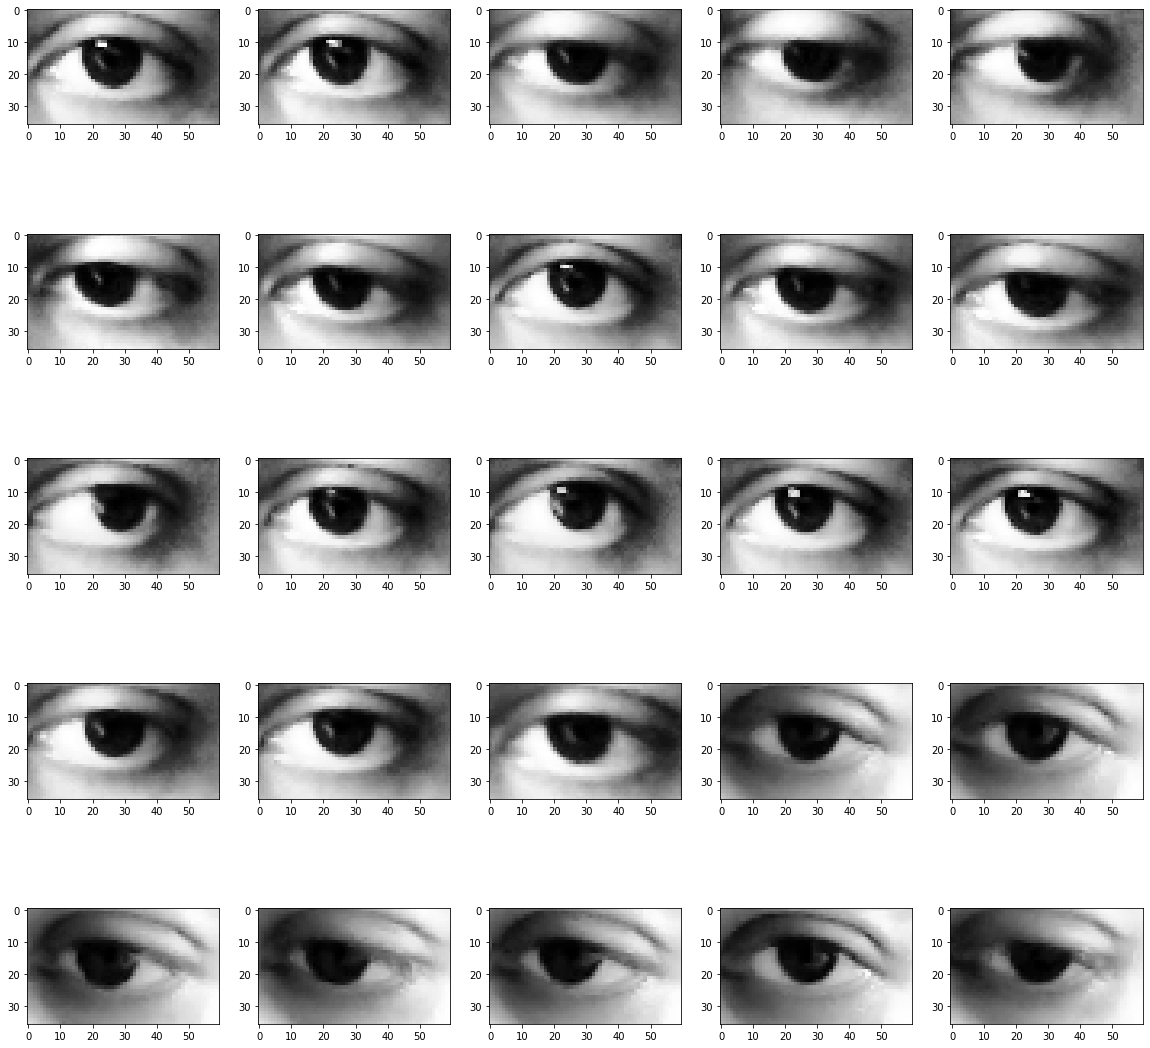

In [ ]:

#all_norm_df.tail(20)
print(all_norm_df.shape[0], 'images loaded')
#group_view = all_norm_df.groupby('group').apply(lambda x: x.sample(20)).reset_index(drop = True)
#print(group_view)
fig, m_axs = plt.subplots(5,5, figsize = (20, 20))
#for (_, c_row), c_ax in zip(group_view.iterrows(), m_axs.flatten()):
for (_, c_row), c_ax in zip(all_norm_df.iterrows(), m_axs.flatten()):
    c_ax.imshow((c_row['img']),cmap = 'gray')
   # cv2.imwrite('images\\'+str(t)+'.jpg',c_row)
    #c_ax.
    #c_ax.legend()
    #c_ax.set_title('{group}'.format(**c_row))
    #c_ax.imwrite(c_row[img],'images_train.jpg')
    

In [ ]:
all_norm_df.shape

(213656, 5)

In [ ]:
for v in ['vec1', 'vec2']:
    for i, x_dim in enumerate('xyz'):
        all_norm_df['{}_{}'.format(v, x_dim)] = all_norm_df[v].map(lambda x: x[i])
all_norm_df.sample(3)

,img,vec1,vec2,group,day,vec1_x,vec1_y,vec1_z,vec2_x,vec2_y,vec2_z
207261,"[[148, 113, 106, 127, 166, 161, 161, 161, 161,...","[0.02649051395408044, 0.04476958435300414, -0....","[-0.474800049958146, -0.08848200160818871, -0....",p01,day53,0.026491,0.044770,-0.998646,-0.474800,-0.088482,-0.021425
2527,"[[87, 87, 87, 93, 95, 97, 103, 108, 111, 108, ...","[0.01251389872254989, 0.24965989234150748, -0....","[-0.18369535797713557, -0.16921431101964968, -...",p06,day08,0.012514,0.249660,-0.968253,-0.183695,-0.169214,-0.015624
191633,"[[76, 66, 72, 52, 27, 35, 0, 0, 0, 0, 0, 0, 6,...","[-0.12203264580439392, 0.2732576813452806, -0....","[0.20287691362375726, -0.05661797927321389, 0....",p01,day06,-0.122033,0.273258,-0.954169,0.202877,-0.056618,0.005765


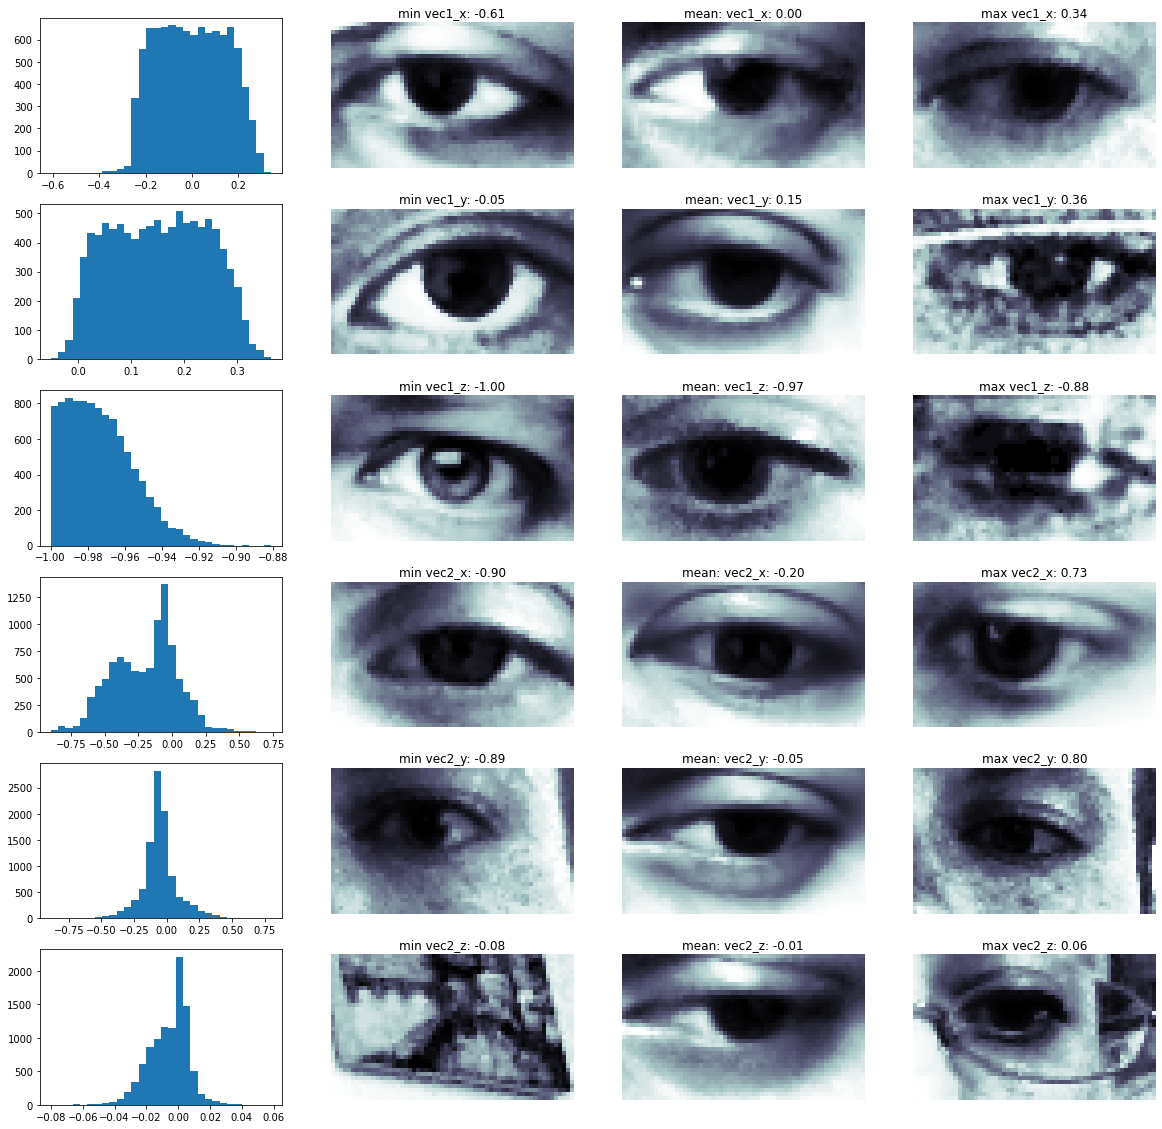

In [ ]:
fig, m_axs = plt.subplots(6, 4, figsize = (20, 20))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
from itertools import product
for (ax_dist, ax_min, ax_mean, ax_max), (v, (i, x)) in zip(m_axs, product(['vec1', 'vec2'], enumerate('xyz'))):
    # use random sampling to get a better feeling
    c_vec = all_norm_df.sample(10000)['{}_{}'.format(v, x)]
    ax_dist.hist(c_vec.values, 30)
    ax_dist.axis('on')
    j = c_vec.idxmin()
    ax_min.imshow(all_norm_df.iloc[j]['img'], cmap = 'bone')
    ax_min.set_title('min {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[j]['{}_{}'.format(v, x)]))
    
    k = c_vec.idxmax()
    ax_max.imshow(all_norm_df.iloc[k]['img'], cmap = 'bone')
    ax_max.set_title('max {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[k]['{}_{}'.format(v, x)]))
    
    p = np.abs(c_vec-np.mean(c_vec)).idxmin()
    ax_mean.imshow(all_norm_df.iloc[p]['img'], cmap = 'bone')
    ax_mean.set_title('mean: {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[p]['{}_{}'.format(v, x)]))

In [ ]:
#find normalised data in all_norm_df
df1= all_norm_df.copy()

In [ ]:
df1.values

In [ ]:
df1.describe

<bound method NDFrame.describe of                                                       img  ...    vec2_z
0       [[106, 106, 110, 116, 116, 120, 124, 127, 139,...  ...  0.005947
1       [[97, 97, 105, 105, 105, 110, 110, 110, 114, 1...  ...  0.006723
2       [[83, 86, 104, 113, 119, 125, 130, 140, 151, 1...  ...  0.003745
3       [[68, 61, 68, 73, 104, 104, 122, 127, 131, 140...  ... -0.013243
4       [[65, 83, 89, 95, 115, 129, 136, 136, 150, 160...  ... -0.011672
...                                                   ...  ...       ...
213651  [[136, 136, 120, 85, 59, 43, 40, 36, 33, 29, 2...  ...  0.008818
213652  [[128, 123, 114, 114, 97, 74, 68, 71, 65, 65, ...  ...  0.002613
213653  [[204, 139, 139, 139, 204, 204, 235, 249, 249,...  ...  0.022081
213654  [[21, 15, 12, 0, 0, 4, 4, 4, 0, 9, 15, 17, 27,...  ...  0.001815
213655  [[50, 40, 32, 23, 20, 13, 13, 9, 0, 0, 0, 4, 1...  ...  0.001710

[213656 rows x 11 columns]>

In [ ]:
df1['img'][0].shape

(36, 60)

In [ ]:

df1['theta'] = -(df1['vec2_y'])


train= df1[:1000]


In [ ]:
sample_train.head(1)

,img,vec1,vec2,group,day,vec1_x,vec1_y,vec1_z,vec2_x,vec2_y,vec2_z,theta
0,"[[106, 106, 110, 116, 116, 120, 124, 127, 139,...","[-0.12405176414970527, 0.05714715237676712, -0...","[-0.07954360836605796, 0.1491653890648997, 0.0...",p06,day01,-0.124052,0.057147,-0.990629,-0.079544,0.149165,0.005947,-0.149165


In [ ]:
#import math as m
#m.asin(-0.0370)

#### convulational neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Concatenate
from keras import layers


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(36, 60, 1)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.MaxPooling2D(3),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(3),
        layers.Flatten(),
        layers.Dense(50),
        
        
    ]
)

feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.output
)
initial_model.compile(loss='mse',optimizer='adam',metrics=['mse','mae','accuracy'])



In [ ]:
feature_vector=pd.DataFrame()
for i in range(0,1000):
  feature_vector['{}'.format(i)]=i
j=0
for v in train['img']:
  x=np.array( train['img'][j])
  x = x.reshape((1, 36, 60,1))
  features = feature_extractor(x)
  proto_tensor=tf.make_tensor_proto(features)
  final=tf.make_ndarray(proto_tensor)
  final=final.reshape(50,)
  feature_vector['{}'.format(j)]=final
  j=j+1

df7=pd.DataFrame()
for i in range(0,1000):
  df7['{}'.format(i)]=i
j=0
for v in train['img']:
  x=np.array( train['img'][j])
  x = x.reshape((1, 36, 60,1))
  features = feature_extractor(x)
  proto_tensor=tf.make_tensor_proto(features)
  final=tf.make_ndarray(proto_tensor)
  final=final.reshape(50,)
  df7['{}'.format(j)]=final
  j=j+1

In [ ]:
feature_vector

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,66.115273,67.487083,61.034492,59.422836,60.251381,70.404045,64.285400,53.644199,64.658051,62.628239,55.524147,70.938065,52.961475,61.657310,68.073471,58.974106,59.116123,59.368477,38.274475,37.449623,26.366798,27.499321,31.414871,39.989220,34.363705,41.737995,36.310490,40.368126,22.815762,38.461555,26.611416,31.887432,34.573639,34.701035,25.381344,33.182384,32.700241,35.574856,30.267891,37.118080,...,33.109291,46.996132,34.366135,54.173981,42.194450,50.355198,46.126896,42.115257,44.326221,45.017586,40.351509,39.145699,27.438587,38.904057,36.998047,32.698792,27.005310,25.409861,27.908648,58.639339,47.231209,62.025314,62.476513,62.358223,45.148342,57.611473,69.184372,63.978065,37.541958,59.535950,65.936104,54.805485,68.074745,50.035530,60.753319,59.006817,60.805161,27.558155,52.161808,56.043324
1,39.112400,36.250759,41.684128,47.985355,51.739983,39.571636,39.799839,36.079475,40.808655,47.462860,43.526699,38.155537,43.740517,36.300339,35.038841,42.542095,42.156227,38.598946,16.031067,16.492523,13.220892,13.583838,15.981264,14.635465,16.052101,17.259171,14.189739,15.403326,12.579640,13.299706,11.293236,11.216775,13.567191,13.436010,11.895243,13.829635,14.490375,13.558757,13.351170,16.294489,...,14.647187,26.414278,12.111479,28.348612,15.255551,18.312441,13.335614,13.528320,16.035194,19.297468,12.769852,13.177229,9.865510,10.452745,15.972210,9.966802,14.723880,7.668921,8.907929,26.411469,21.994814,32.800560,32.316410,30.809387,24.515375,28.858206,37.402431,35.459202,17.801414,26.053591,42.345482,23.817770,34.690670,19.134674,35.362251,22.767775,33.038670,17.920935,30.869005,28.081249
2,36.866192,31.801540,32.773788,35.404850,38.118500,42.228809,33.052883,28.219076,36.190701,41.264523,34.409130,35.316223,23.934546,27.318142,29.892853,28.458269,26.479918,32.014545,17.604664,17.467623,19.781307,17.035194,19.844513,16.870951,21.892986,17.153288,17.205448,22.774094,18.029978,16.938244,21.148504,21.842314,17.040014,18.596979,17.789841,19.278870,18.488295,17.339209,21.118589,17.992090,...,17.440931,17.082685,20.790461,22.972614,24.076658,26.361107,21.612276,26.709869,18.735300,17.434004,18.675220,18.075098,17.539967,17.268812,21.908392,20.994761,21.343445,21.831179,16.471935,43.171978,29.333681,30.706472,46.826065,26.966400,27.936308,20.372950,46.966286,32.400826,26.292601,24.349466,31.452869,25.452000,37.740185,22.839249,37.532372,21.666599,36.140175,15.321717,22.597164,28.031912
3,-41.214451,-42.666733,-36.580822,-40.840057,-45.949196,-40.326366,-38.658455,-44.762787,-37.481918,-39.294682,-44.024414,-43.796883,-45.999104,-45.858284,-40.444912,-49.145096,-53.206100,-42.790951,-16.388643,-18.170444,-17.012907,-12.256092,-16.462713,-20.108294,-15.535892,-23.430212,-20.230669,-24.063662,-14.119772,-23.649824,-16.096979,-13.525776,-16.885489,-18.737244,-14.650319,-16.525978,-16.570353,-17.918894,-12.862035,-16.616093,...,-25.472294,-33.769749,-30.638069,-40.119953,-22.541693,-21.296873,-17.712412,-16.652874,-18.646402,-28.455860,-23.094168,-21.415791,-24.701477,-20.221403,-21.824965,-15.626353,-22.224489,-22.152115,-19.065193,-22.472061,-21.900091,-37.322128,-25.194128,-40.486031,-29.997950,-42.067863,-36.078896,-42.703228,-26.345396,-37.326180,-46.740246,-32.256668,-35.096733,-33.173496,-42.683483,-30.507853,-40.838707,-22.017530,-33.587677,-30.558561
4,1.847802,1.143865,6.004722,8.255666,2.462120,13.826579,9.098431,-0.445913,9.021241,5.859794,-2.423985,3.465549,-0.967021,4.351921,5.226667,1.687447,-0.146308,4.950743,10.501005,11.843536,7.906337,8.890722,9.335932,9.295795,12.494693,10.138055,12.058839,15.173836,9.365529,10.748330,9.552073,14.654888,10.618705,9.968102,9.188477,11.442503,11.964678,10.898416,11.615266,13.626589,...,-3.931433,-2.377317,-0.170968,-3.391223,

In [ ]:
feature_vector=feature_vector.transpose()

In [ ]:
feature_vector

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,66.115273,39.112400,36.866192,-41.214451,1.847802,23.231052,-3.851716,-17.342287,41.657814,-28.625195,-17.274693,-22.876396,-26.508629,53.663956,-20.903057,2.083391,22.039379,-12.581532,42.961292,8.378284,20.916559,34.086723,11.420716,-0.873150,19.420866,-19.122885,-1.603475,62.152103,-0.219263,2.241678,-14.172225,-7.195999,-8.087932,-1.832000,-27.047565,-17.450378,-9.207713,19.468340,9.170716,3.450887,9.990424,1.489880,-5.707863,-63.258999,-12.016731,-7.857235,10.867492,48.073502,44.469872,-17.788589
1,67.487083,36.250759,31.801540,-42.666733,1.143865,24.423441,-2.253955,-24.405130,36.749191,-25.469965,-14.321697,-22.169569,-28.729445,56.746346,-27.231350,3.277750,23.008608,-10.807458,37.328678,-0.148750,10.796431,35.725292,12.218746,-5.078661,17.149271,-14.797011,-7.195284,63.582783,-7.437023,-2.608810,-14.463705,-11.712586,-10.514658,-1.148685,-29.312433,-18.186222,-0.958106,9.935012,11.746308,4.842463,7.493536,6.538360,-8.001420,-56.848610,-5.407849,-3.738490,7.599648,48.575657,43.518570,-17.227884
2,61.034492,41.684128,32.773788,-36.580822,6.004722,27.725288,-3.390578,-21.313766,33.258835,-20.983849,-9.499227,-18.943016,-23.286970,44.254040,-18.653481,4.750647,18.878187,-17.061058,35.643589,5.335829,17.537348,30.720205,8.452353,-0.128306,18.108723,-26.986240,5.823159,58.868847,4.798852,2.978298,-5.790922,-12.788982,-10.695751,-0.575984,-24.874111,-7.014626,-7.093185,9.784738,5.457378,8.415474,12.193437,2.543319,-2.848733,-52.692776,-19.138052,-8.192139,7.678851,40.476227,34.753960,-10.936076
3,59.422836,47.985355,35.404850,-40.840057,8.255666,38.380390,4.474606,-22.182001,34.791046,-21.078838,-1.365484,-22.322618,-28.757845,36.713116,-16.948051,3.529882,16.356451,-9.711808,34.666134,10.784111,19.414255,31.313715,10.925414,-5.132954,19.921282,-20.757349,2.153881,64.960861,2.275571,6.686908,-6.604376,-16.720747,-15.821463,1.374265,-22.594124,-6.529291,-9.547367,13.205493,4.793937,17.243982,7.365263,1.956446,4.149866,-48.042805,-24.151285,-2.467233,8.043472,34.559971,37.750160,-13.174448
4,60.251381,51.739983,38.118500,-45.949196,2.462120,41.583153,4.888573,-19.475307,34.450191,-22.963503,4.265736,-23.824711,-30.460859,34.664848,-16.000896,-0.973171,12.178572,-7.950242,32.194748,5.527045,16.281513,31.813641,11.989872,-6.301299,25.747936,-19.617416,1.786045,60.091743,4.418763,3.726622,-8.465736,-21.755913,-19.229858,4.518199,-22.560408,-14.265142,-11.459448,11.553678,2.141801,18.605230,4.543093,2.506852,7.337628,-47.094955,-22.865137,-3.530226,5.522698,32.030594,40.812149,-19.339693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59.006817,22.767775,21.666599,-30.507853,-6.939179,24.804735,2.205249,-17.274660,28.500448,-28.948338,5.192519,-22.300335,-20.345358,46.650307,-30.068556,10.864957,4.981661,1.402121,30.178087,-1.680950,-0.920436,23.837099,8.306922,-8.850179,13.039970,5.518485,-3.713146,33.091515,-14.606515,4.224945,-16.229681,-8.310931,-13.643127,4.959558,-17.615654,-19.565157,8.365975,-3.062539,13.048522,3.567473,4.919708,8.887481,-6.909144,-29.593256,-1.531898,4.219626,13.771741,23.891165,38.344368,-5.257442
996,60.805161,33.038670,36.140175,-40.838707,2.480043,21.147699,1.502359,-27.392406,34.170731,-30.304953,-5.295128,-16.265728,-28.078844,39.426769,-25.035318,3.038744,12.136968,-5.435307,26.763191,-4.080298,5.635289,19.621571,8.300936,-6.345129,4.275733,-13.049604,-2.507871,36.378349,2.203229,-1.783967,-12.444096,-5.741989,-11.654449,-0.007054,-12.027530,-26.356895,1.560528,1.600250,7.512899,2.366748,1.463852,0.098631,-4.090432,-39.779469,-12.106271,-2.364656,13.828630,29.197109,50.932411,-17.516903
997,27.558155,17.920935,15.321717,-22.017530,-4.924248,21.369169,8.942986,-11.785443,11.486593,-12.013267,11.007691,

In [ ]:
train.head(5)

,img,vec1,vec2,group,day,vec1_x,vec1_y,vec1_z,vec2_x,vec2_y,vec2_z,theta
0,"[[106, 106, 110, 116, 116, 120, 124, 127, 139,...","[-0.12405176414970527, 0.05714715237676712, -0...","[-0.07954360836605796, 0.1491653890648997, 0.0...",p06,day01,-0.124052,0.057147,-0.990629,-0.079544,0.149165,0.005947,-0.149165
1,"[[97, 97, 105, 105, 105, 110, 110, 110, 114, 1...","[-0.22584938919355554, 0.05801594170904099, -0...","[-0.06486560801157783, 0.20648779962972616, 0....",p06,day01,-0.225849,0.058016,-0.972433,-0.064866,0.206488,0.006723,-0.206488
2,"[[83, 86, 104, 113, 119, 125, 130, 140, 151, 1...","[-0.07132209453997078, 0.24997981806494585, -0...","[-0.10499587351319525, 0.07123775179497581, 0....",p06,day01,-0.071322,0.249980,-0.965621,-0.104996,0.071238,0.003745,-0.071238
3,"[[68, 61, 68, 73, 104, 104, 122, 127, 131, 140...","[0.10947268874684388, 0.317280831866284, -0.94...","[-0.10435453747461602, -0.25221726058991434, -...",p06,day01,0.109473,0.317281,-0.941992,-0.104355,-0.252217,-0.013243,0.252217
4,"[[65, 83, 89, 95, 115, 129, 136, 136, 150, 160...","[0.20628878857734986, 0.2110378162068959, -0.9...","[-0.08143189588024485, -0.2845691231443304, -0...",p06,day01,0.206289,0.211038,-0.955462,-0.081432,-0.284569,-0.011672,0.284569
